# **1. Load dataset**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the data

file_path = 'C:\\Users\\Windows\\Desktop\\House-Price-Prediction\\Data\\clean_data.csv'
data = pd.read_csv(file_path)

In [18]:
data.head()

,No,Price,Area,Bedrooms,WCs,Floors,Legal_status,Frontage,Price_per_sqm,District_encoded,Month
0,1,13.5,44.00,3.0,3.0,5.0,-1.0,1.0,0.31,0,11
1,2,8.7,45.00,3.0,3.0,4.0,1.0,0.0,0.19,0,11
2,3,9.3,40.00,4.0,4.0,4.0,1.0,0.0,0.23,0,11
3,4,15.0,151.69,5.0,4.0,3.0,-1.0,1.0,0.10,0,10
4,5,16.0,151.69,5.0,4.0,3.0,-1.0,1.0,0.11,0,10


In [19]:
# Check for missing values
display(data.isnull().sum())

No                  0
Price               0
Area                0
Bedrooms            0
WCs                 0
Floors              0
Legal_status        0
Frontage            0
Price_per_sqm       0
District_encoded    0
Month               0
dtype: int64

In [20]:
# Split the dataset into features (X) and target variable (Y)
X = data.drop(columns = ['No', 'Price'])
Y = data['Price']

In [21]:
# Scaling numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **2. Train model with default parameters**

In [10]:
# Train model with default parameters
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.19977880407305726
Mean Absolute Error (MAE): 0.2937219519984667
R^2 Score: 0.9825851273145485


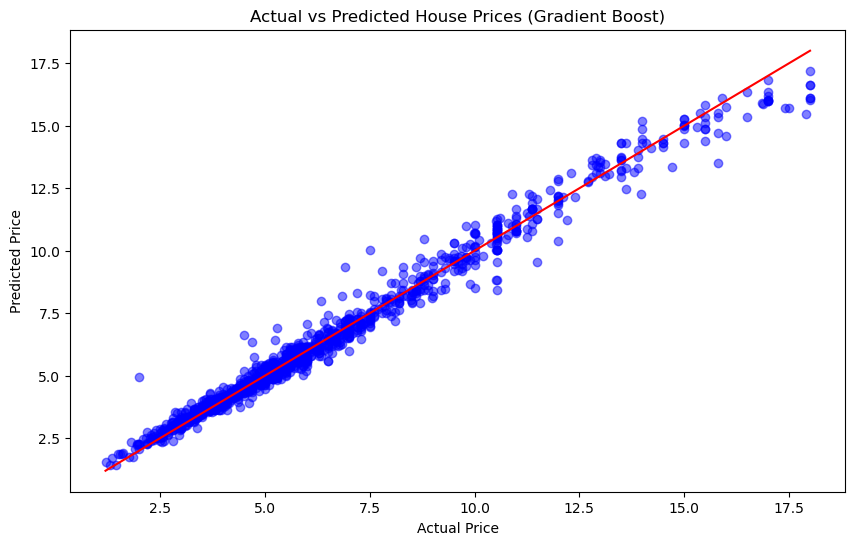

In [12]:
import matplotlib.pyplot as plt

# Víualize the plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, predictions, color='blue', alpha=0.5)
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red')
plt.title('Actual vs Predicted House Prices (Gradient Boost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# **3. Train model with optimized parameters**

In [13]:
# Optimize Parameters
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Define parameters
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=100, cv=5, n_jobs=-1, scoring='r2', verbose=2, random_state=42)

# Train RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Find the best parameters
print(f"Best parameters: {random_search.best_params_}")
print(f"Best R^2 Score: {random_search.best_score_}")

# Use the model with best parmeters
best_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}
Best R^2 Score: 0.9851785459612085


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = best_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.09168675995289524
Mean Absolute Error (MAE): 0.20868536967116513
R^2 Score: 0.9920075943044623


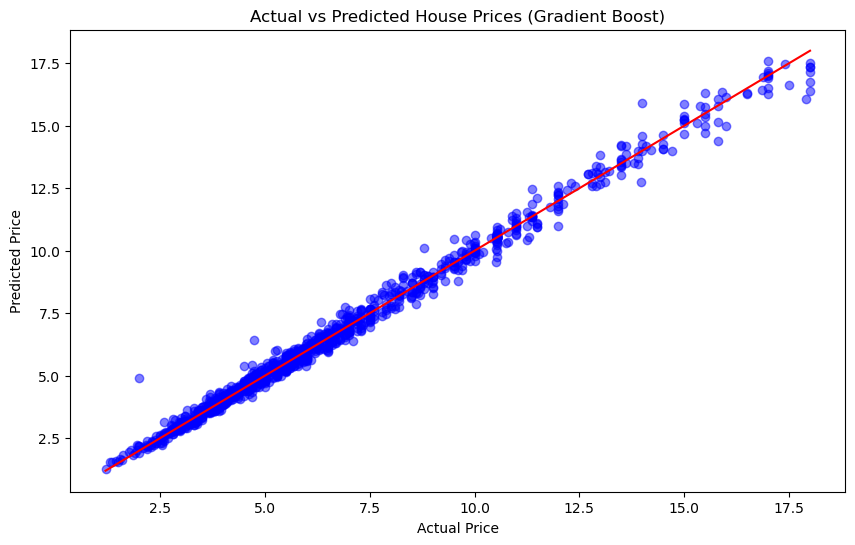

In [15]:
# Visualize the plot comparing predicted results with actual data on testing dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, predictions, color='blue', alpha=0.5)
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red')
plt.title('Actual vs Predicted House Prices (Gradient Boost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# **Gradient Boosting**

**1. Tổng quan về Gradient Boosting**
* Gradient Boosting Regressor là một thuật toán học máy thuộc loại ensemble learning, tức là nó kết hợp nhiều mô hình yếu để tạo thành một mô hình mạnh mẽ hơn.

* Gradient Boosting Regressor có thể xử lý các mô hình phi tuyến tính và phức tạp, giúp mô hình học được các quan hệ phức tạp giữa các biến đầu vào và đầu ra.

**2. Cách thức hoạt động của Gradient Boosting**

* Mỗi cây quyết định được xây dựng theo cách tuần tự (sequential) và chuỗi (sequential). Đầu tiên, một cây quyết định đơn giản được huấn luyện trên dữ liệu ban đầu để dự đoán giá trị mục tiêu (target).

* Sau đó, các cây quyết định tiếp theo được xây dựng để sửa đổi và cải thiện lỗi của cây trước đó trong chuỗi. Quá trình này làm tăng dần độ chính xác của mô hình bằng cách tập trung vào việc khắc phục những sai số còn lại.

* Thuật toán sử dụng phương pháp Gradient Descent để tối thiểu hóa hàm mất mát (loss function), giúp điều chỉnh các dự đoán của mỗi cây quyết định để làm giảm sai số.

* Mỗi cây quyết định mới được huấn luyện để tối ưu hóa hàm mất mát tích lũy (cumulative loss), tức là tổng của hàm mất mát trên toàn bộ chuỗi các cây đã xây dựng.

**3. Tại sao Decision Tree thường được sử dụng làm mô hình yếu (weak learners) trong Gradient Boosting**
1. Đơn giản và dễ hiểu
* Decision Tree hoạt động bằng cách phân đoạn không gian đầu vào thành các phần nhỏ hơn và dự đoán giá trị mục tiêu dựa trên các quy tắc quyết định đơn giản. Điều này làm cho việc huấn luyện và hiểu mô hình trở nên dễ dàng, đặc biệt là khi áp dụng trong một chuỗi Gradient Boosting.

2. Tính phi tuyến tính:
* Decision Tree có khả năng biểu diễn các mối quan hệ phi tuyến tính giữa các đặc trưng đầu vào và giá trị mục tiêu.
* Trái ngược với các mô hình tuyến tính, Decision Tree có thể xử lý được nhiều loại dữ liệu và tạo ra các quyết định phức tạp dựa trên sự tương tác giữa các biến đầu vào.

3. Khả năng tạo ra overfitting:
* Decision Tree có xu hướng dễ dàng bị overfitting khi huấn luyện trên dữ liệu huấn luyện, đặc biệt khi không giới hạn độ sâu của cây
* Tuy nhiên, khi sử dụng như một mô hình yếu trong Gradient Boosting, việc overfitting này được kiểm soát bởi quá trình học tuần tự và chuỗi các cây trong ensemble.

4. Dễ dàng để điều chỉnh và tối ưu:
* Decision Tree có nhiều tham số điều chỉnh như độ sâu tối đa của cây, số lượng mẫu tối thiểu cho mỗi nút lá, tiêu chí phân chia, ... Những tham số này cho phép điều chỉnh mô hình để tối ưu hóa hiệu suất dự đoán.

5. Phù hợp với việc tối ưu Gradient:
* Trong quá trình Gradient Boosting, các cây quyết định được xây dựng để giảm thiểu hàm mất mát (loss function) theo một hướng tối ưu hóa gradient.
* Các cây quyết định, bởi tính chất của chúng, có thể tạo ra các dự đoán chưa tối ưu trong từng bước của quá trình này, làm cơ sở cho quá trình tối ưu hóa gradient.

**4. So sánh Gradient Boosting và Random Forest**
* Trong khi Random Forest cũng là một phương pháp ensemble learning, nó khác biệt với Gradient Boosting Regressor ở chỗ mỗi cây quyết định trong Random Forest được huấn luyện độc lập với nhau và không phụ thuộc vào cây trước đó.
* Điều này làm cho Random Forest thích hợp khi cần xử lý nhiễu và giảm thiểu hiện tượng overfitting, trong khi Gradient Boosting Regressor thường có khả năng dự đoán tốt hơn với các mô hình phức tạp hơn.

# **RandomizedSearchCV**

**Tổng quan về RandomizedSearch CV**
* RandomizedSearchCV là một công cụ trong thư viện scikit-learn được sử dụng để tối ưu hóa siêu tham số của một mô hình máy học thông qua việc thử nghiệm ngẫu nhiên các giá trị của các tham số được chỉ định.

# **4. Report**

**1. Tổng quan: Báo cáo về Dự đoán giá nhà bằng Gradient Boosting Regressor** <br>

Báo cáo này sẽ thảo luận về việc sử dụng mô hình Gradient Boosting Regressor để dự đoán giá nhà. <br>

Mô hình này là một công cụ mạnh mẽ trong học máy, có khả năng xây dựng một chuỗi các cây quyết định để dự đoán giá trị liên tục trong các bài toán hồi quy (regression) và phân loại (classification). <br>

Vì thế, nhóm em nghĩ mô hình trên sẽ phù hợp với bài toán hồi quy Dự đoán giá nhà. <br>

**2. Quá trình thực hiện:**

**2.1 Huấn luyện mô hình với những tham số mặc định**


Sau khi huấn luyện, đánh giá mô hình qua các metric: Mean Squared Error (MSE) và R-squared (R²) score: <br>
* **Mean Squared Error (MSE)**: 0.1998
* **Mean Absolute Error (MAE)**: 0.2937
* **R^2 Score**: 0.9826

Những kết quả này cho thấy mô hình hoạt động rất hiệu quả trong việc dự đoán giá nhà, với độ chính xác cao trên cả tập huấn luyện và tập kiểm tra

**2.2 Huấn luyện mô hình với những tham số đã tối ưu**

**a. Các tham số cần điều chỉnh để có một mô hình Gradient Boosting tối ưu hơn:** <br>

* **n_estimatior**: Số lượng cây trong ensemble. <br>
* **max_depth**: Độ sâu tối đa của cây quyết định <br>
* **min_sample_split**: Số lượng mẫu tối thiểu cần thiết để chia một nút nội bộ <br>
* **min_samples_leaf**: Số lượng mẫu tối thiểu cần thiết để thành một lá trong cây <br>
* **subsample**: Tỷ lệ mẫu được sử dụng để huấn luyện mỗi cây <br>
* **learning_rate**: Tỷ lệ học của cây <br>

**b. Tối ưu hóa tham số của Gradient Boosting sử dụng RandomizedSearchCV** <br>

RandomizedSearchCV sẽ lặp lại quá trình huấn luyện với từng tổ hợp tham số, sử dụng cross-validation để đánh giá mô hình với từng tổ hợp. <br>
Sau khi hoàn thành, nó sẽ chọn tổ hợp tham số tốt nhất dựa trên điểm số tối ưu hóa được chỉ định (ở đây là 'r2'). <br>
Mô hình tốt nhất được chọn sau đó có thể được sử dụng để dự đoán trên dữ liệu mới. <br>

**Note:** Cross-validation dùng để đánh giá hiệu suất của mô hình dự đoán và đảm bảo rằng mô hình không bị overfitting hoặc underfitting. Kỹ thuật này chia tập dữ liệu ban đầu thành các phần nhỏ để huấn luyện và kiểm tra mô hình nhiều lần, từ đó cung cấp một đánh giá chính xác và toàn diện hơn về hiệu suất của mô hình. <br>

* **Estimator**: Là mô hình máy học cần được tối ưu hóa. Trong ví dụ của chúng ta, GradientBoostingRegressor được chọn làm mô hình.
* **Param_distributions**: Là danh sách các tham số của mô hình cần tối ưu hóa cùng với các giá trị mà chúng có thể nhận. Các giá trị này được chỉ định dưới dạng một từ điển, trong đó mỗi khóa là tên của tham số và mỗi giá trị là một danh sách các giá trị có thể

* **n_iter**: Số lượng lần lặp để tìm kiếm ngẫu nhiên trong không gian tham số. Mỗi lần lặp, một tổ hợp tham số ngẫu nhiên sẽ được chọn để đào tạo mô hình và đánh giá.
* **cv**: Số lượng fold trong cross-validation để đánh giá mô hình. Trong ví dụ này, chúng ta sử dụng 5 folds.
* **n_jobs**: Số lượng công việc được chạy đồng thời (-1 nghĩa là sử dụng tất cả các CPU).
* **scoring**: Điểm số mà chúng ta sử dụng để đánh giá hiệu suất của mô hình. Trong ví dụ này, sử dụng 'r2' để đo lường hệ số xác định R².
* **verbose**: Cấp độ thông tin chi tiết của quá trình huấn luyện. Ở đây, giá trị 2 cho phép in chi tiết cho mỗi lần lặp của RandomizedSearchCV.
* **random_state**: Để đảm bảo kết quả có thể tái tạo, giá trị này đảm bảo rằng việc chọn tổ hợp tham số ngẫu nhiên là nhất quán.

**c. Kết quả thu được từ mô hình tốt nhất các tham số như sau:** <br>
  {'subsample': 0.7, <br>
  'n_estimators': 300, <br>
  'min_samples_split': 10, <br>
  'min_samples_leaf': 1, <br>
  'max_depth': 5, <br>
  'learning_rate': 0.05} <br>

**d. Đánh giá mô hình**: <br>
Sau khi huấn luyện, mô hình tốt nhất sẽ được đánh giá qua các metric: Mean Squared Error (MSE) và R-squared (R²) score.

* **Best R² Score**: 0.9852
* **Mean Squared Error (MSE)**: 0.0917
* **Mean Absolute Error (MAE)**: 0.2087
* **R² Score**: 0.9920

Những kết quả này cho thấy mô hình hoạt động rất hiệu quả trong việc dự đoán giá nhà, với độ chính xác cao trên cả tập huấn luyện và tập kiểm tra.

**3. Kết luận**: <br>
Trong báo cáo này, chúng ta đã thảo luận về việc sử dụng Gradient Boosting Regressor để dự đoán giá nhà, từ việc lý thuyết về mô hình đến các kỹ thuật tối ưu hóa mô hình như RandomizedSearchCV. Các kết quả đã chứng minh tính hiệu quả của mô hình trong bài toán dự đoán giá nhà, với sự chính xác cao và khả năng áp dụng thực tế mạnh mẽ.

# **5. Pros and Cons Analysis**

**Ưu điểm của Gradient Boosting**

**1. Hiệu suất cao** <br>
Gradient Boosting thường mang lại độ chính xác rất cao, đặc biệt khi áp dụng cho các bài toán hồi quy và phân loại. Nhờ khả năng kết hợp nhiều mô hình yếu (weak learners) để tạo thành một mô hình mạnh, Gradient Boosting có thể giảm thiểu lỗi dự đoán và cải thiện hiệu suất tổng thể.

**2. Khả năng xử lý các đặc trưng phức tạp** <br>
Gradient Boosting có thể xử lý tốt các dữ liệu với nhiều đặc trưng phức tạp và không tuyến tính. Các cây quyết định sử dụng trong Gradient Boosting có thể nắm bắt các tương tác phức tạp giữa các đặc trưng mà các mô hình tuyến tính không thể phát hiện.

**3. Khả năng tùy chỉnh cao** <br>
Gradient Boosting cung cấp nhiều siêu tham số (hyperparameters) có thể tùy chỉnh, chẳng hạn như số lượng cây, độ sâu của cây, learning rate, v.v. Điều này cho phép người dùng điều chỉnh mô hình để đạt hiệu suất tốt nhất cho từng bài toán cụ thể.

**4. Quản lý overfitting** <br>
Gradient Boosting có cơ chế chống overfitting tốt hơn so với các phương pháp khác như quyết định cây đơn lẻ, nhờ vào việc sử dụng learning rate và khả năng cắt tỉa cây (pruning).

**Nhược điểm của Gradient Boosting**

**1. Thời gian huấn luyện dài** <br>
Gradient Boosting yêu cầu nhiều thời gian huấn luyện hơn so với một số thuật toán khác, đặc biệt là khi số lượng cây và độ sâu của cây lớn. Điều này có thể gây ra vấn đề khi xử lý các bộ dữ liệu lớn hoặc khi yêu cầu thời gian phản hồi nhanh.

**2. Yêu cầu tài nguyên tính toán cao** <br>
Gradient Boosting đòi hỏi nhiều tài nguyên tính toán hơn, bao gồm cả bộ nhớ và CPU/GPU. Điều này có thể trở thành rào cản khi làm việc với dữ liệu lớn hoặc trong môi trường tính toán hạn chế.

**3. Nhạy cảm với siêu tham số** <br>
Gradient Boosting rất nhạy cảm với các siêu tham số. Việc chọn sai các giá trị như số lượng cây, learning rate, và độ sâu của cây có thể dẫn đến overfitting hoặc underfitting. Việc tìm kiếm các siêu tham số tối ưu thường đòi hỏi nhiều thời gian và công sức.

**4. Khó giải thích** <br>
Gradient Boosting vẫn khó giải thích hơn so với các mô hình đơn giản như hồi quy tuyến tính hoặc quyết định cây đơn lẻ. Điều này có thể là một hạn chế trong các lĩnh vực yêu cầu tính minh bạch cao.

# **6. So sánh với Linear Regression**

**Khi so sánh với Gradient Boosting, Linear Regression có một số các ưu điểm có thể kể đến:**

**1. Đơn giản và dễ hiểu:** <br>
Mô hình đơn giản với khả năng giải thích rõ ràng. Kết quả đầu ra dễ dàng được diễn giải, giúp người dùng hiểu rõ mối quan hệ giữa các biến.<br>

**2. Thời gian huấn luyện nhanh:** <br>
Thời gian huấn luyện nhanh chóng ngay cả với các bộ dữ liệu lớn. <br>

**3. Tài nguyên tính toán thấp:** <br>
Đòi hỏi ít tài nguyên tính toán hơn, phù hợp với các hệ thống hạn chế về tài nguyên. <br>


**4. Ít nhạy cảm với siêu tham số:** <br>
Có ít siêu tham số cần điều chỉnh, giúp giảm bớt thời gian và công sức tìm kiếm giá trị tối ưu. <br>

**Bên cạnh đó, có một số nhược điểm sau:**

**1. Hiệu suất thấp với dữ liệu phi tuyến:** <br>
Không hiệu quả với các dữ liệu có mối quan hệ phi tuyến tính. Linear Regression chỉ có thể nắm bắt mối quan hệ tuyến tính giữa các biến.<br>

**2. Không xử lý tốt các đặc trưng phức tạp:** <br>
Không thể nắm bắt được các tương tác phức tạp giữa các đặc trưng mà Gradient Boosting có thể xử lý.

**3. Dễ bị ảnh hưởng bởi outliers:** <br>
Dễ bị ảnh hưởng bởi các giá trị ngoại lai (outliers), có thể làm lệch kết quả dự đoán.